In [1]:
#These are the variables that will be presented in the project

#Hits: Number of hits in 1986
#HmRun: Number of home runs in 1986
#RBI: Number of runs batted in in 1986
#Salary: 1987 annual salary on opening day in thousands of dollars
#Years: Number of years in the major leagues
#League: A factor with levels A and N indicating the player's league at the end of 1986
#Division: A factor with levels E and W indicating the player's division at the end of 1986

In [3]:
#Import the files and libraries needed to upload the baseball data
import pandas as pd
import zipfile
import requests
import io

#Look at the raw url of the zip file
zip_url = "https://raw.githubusercontent.com/webba040406/Webber530Final/main/archive.zip"

#Download the zip file from GitHub
response = requests.get(zip_url)
if response.status_code == 200:
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    
    #Extract the zip file
    zip_file.extractall("data")
    
    #List the extracted files to make sure the dataset uploaded correctly
    extracted_files = zip_file.namelist()
    print("Extracted Files:", extracted_files)
    
    #Load the csv hitters file into a pandas data frame
    csv_filename = "data/Hitters.csv"  
    df = pd.read_csv(csv_filename)
    
    #Display the first few rows of the dataset
    print(df.head())

else:
    print("Failed to download the file. Check the URL to see if pasted incorrectly.")


Extracted Files: ['Hitters.csv']
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


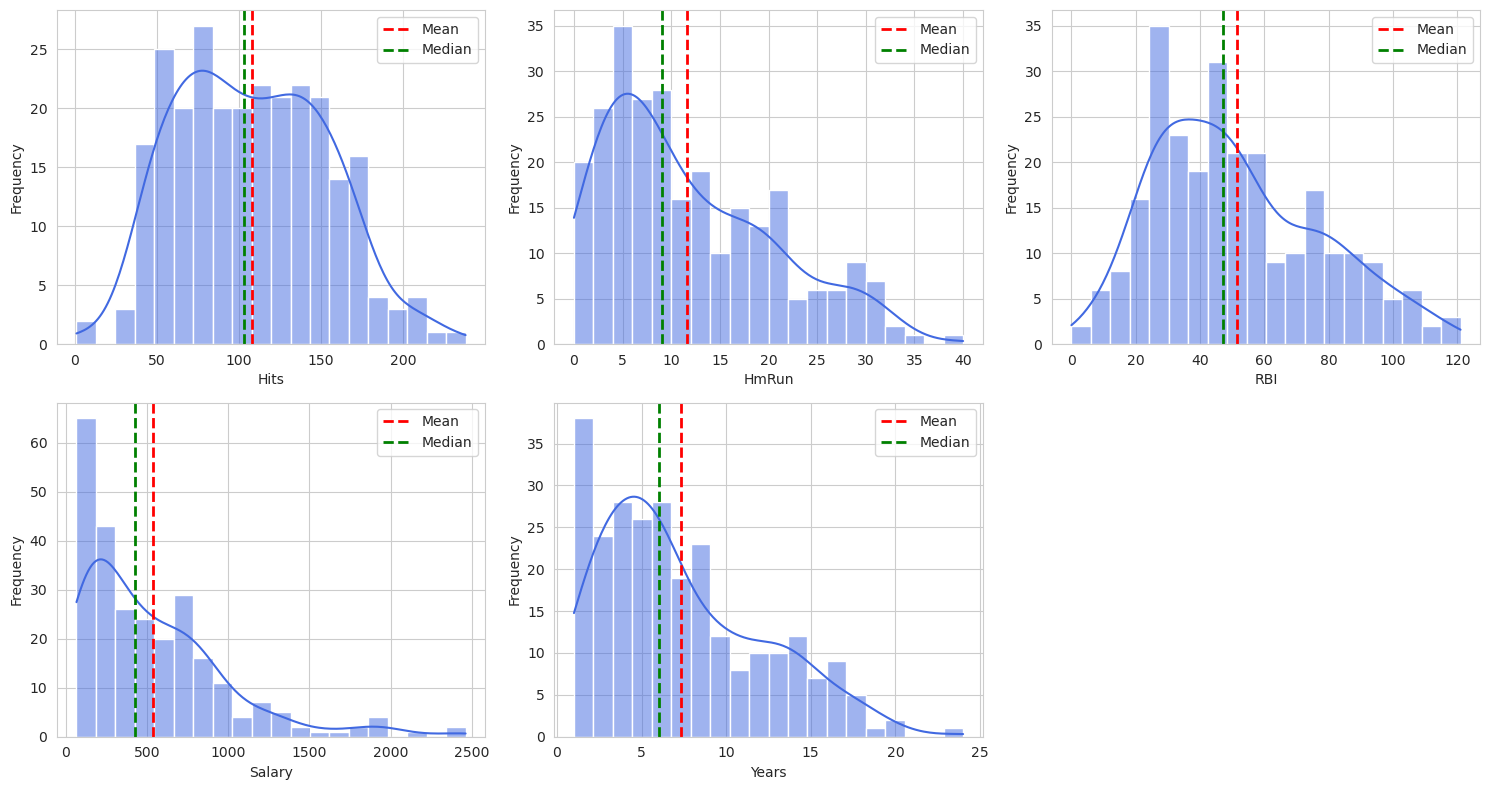

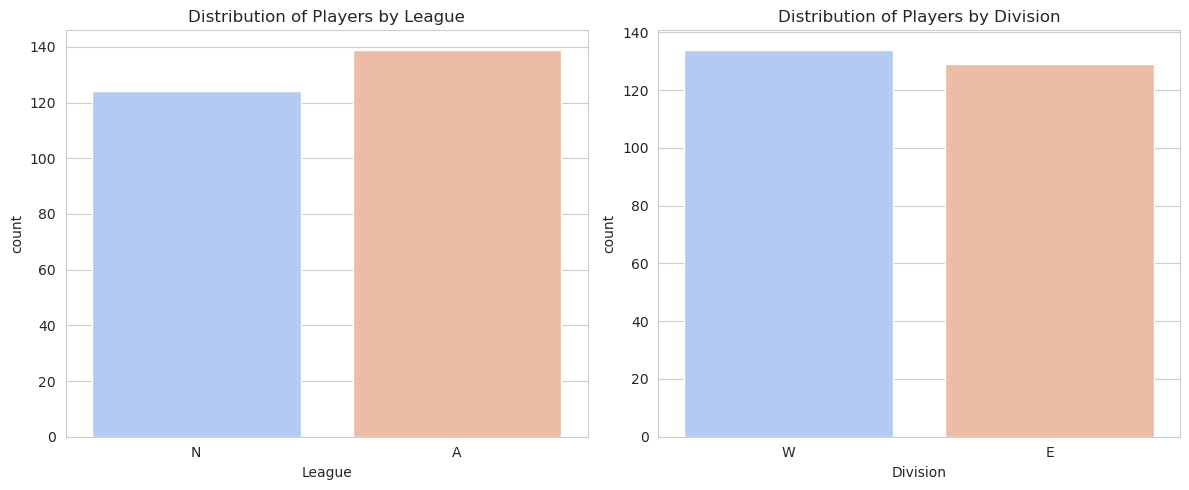


No significant outliers detected in Hits.

Outliers in HmRun:
136    40
Name: HmRun, dtype: int64

No significant outliers detected in RBI.

Outliers in Salary:
82     1975.000
84     1900.000
96     1861.460
100    2460.000
112    1925.571
163    2412.500
179    1800.000
217    2127.333
229    1940.000
248    1670.000
313    1600.000
Name: Salary, dtype: float64

Outliers in Years:
121    20
236    24
249    20
Name: Years, dtype: int64

Salary Statistics:
count     263.000000
mean      535.925882
std       451.118681
min        67.500000
25%       190.000000
50%       425.000000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64


In [12]:
#Import the files and libraries needed to complete histograms for all the variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

#Remove future warnings from Seaborn or Pandas
warnings.simplefilter(action='ignore', category=FutureWarning)

#Load the baseball dataset
df = pd.read_csv("data/Hitters.csv")

#Select all the variables needed for the research questions and hypotheses
selected_vars = ["Hits", "HmRun", "RBI", "Salary", "Years", "League", "Division"]

#Remove missing values, especially in the salary column
df = df[selected_vars].dropna()

#Set up a clean and readable plotting style for Seaborn
sns.set_style("whitegrid")

#Setting up the numerical variables to create a histogram
num_vars = ["Hits", "HmRun", "RBI", "Salary", "Years"]

plt.figure(figsize=(15, 8))  #Identify the size of the chart
for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)  #The chart will have 2-rows, 3-columns 
    sns.histplot(df[var], bins=20, kde=True, color="royalblue")
    plt.axvline(df[var].mean(), color="red", linestyle="dashed", linewidth=2, label="Mean")  #Add mean line on the chart
    plt.axvline(df[var].median(), color="green", linestyle="dashed", linewidth=2, label="Median")  #Add median line on the chart
    plt.xlabel(var)  #Name of the x-axis
    plt.ylabel("Frequency")  #Name of the y-axis
    plt.legend()  #Show legend on the chart 

plt.tight_layout()  #Modifies the layout so the charts don't overlap
plt.show()

#Setting up the categorical variables to create a bar chart
plt.figure(figsize=(12, 5))  #Identify the size of the chart

plt.subplot(1, 2, 1)  #The chart will have 1-row, 2-columns 
sns.countplot(x="League", data=df, palette="coolwarm")  #Chart shows how many players are in each league
plt.title("Distribution of Players by League")  #Add title

plt.subplot(1, 2, 2)   #The chart will have 1-row, 2-columns
sns.countplot(x="Division", data=df, palette="coolwarm")  #Chart shows how many players are in each division
plt.title("Distribution of Players by Division")   #Add title

plt.tight_layout()  #Modifies the layout so the charts don't overlap
plt.show()

#Detect outliers using interquartile range
outliers = {}
for var in num_vars:
    Q1 = df[var].quantile(0.25)  #First quartile, 25th percentile
    Q3 = df[var].quantile(0.75)   #Third quartile, 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  #Identify the lower and upper bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    outliers[var] = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]  #Show outliers that fall outside this range

#Display detected outliers
for var, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"\nOutliers in {var}:")
        print(outlier_values)
    else:
        print(f"\nNo significant outliers detected in {var}.")  #Pop up this message if outliers do not exist within that variable

#Want to check if there are extreme values in the salary column
print("\nSalary Statistics:")
print(df["Salary"].describe())


In [2]:
#Import the libraries needed to show the descriptive characteristics for each variable
import pandas as pd
import numpy as np

#Load the baseball dataset
df = pd.read_csv("data/Hitters.csv")

#Select all the variables being looked at for research questions/hypothesis
selected_vars = ["Hits", "HmRun", "RBI", "Salary", "Years", "League", "Division"]

#Remove missing values
df = df[selected_vars].dropna()

#Descriptive statistics (Mean, Mode, Spread, Tails)
desc_stats = pd.DataFrame(columns=["Mean", "Mode", "Standard Deviation", "IQR", "Skewness", "Kurtosis"])
#Calculate the descriptive statistics for each numerical variable
for var in ["Hits", "HmRun", "RBI", "Salary", "Years"]:
    mean = df[var].mean()  #Calculate the mean
    mode = df[var].mode()[0]  #Calculate the mode
    std_dev = df[var].std()  #Calculate the standard deviation
    Q1 = df[var].quantile(0.25)  #Calculate the interquartile range
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    skewness = df[var].skew()  #Calculate skewness
    kurtosis = df[var].kurt()   #Calculate kurtosis

    desc_stats.loc[var] = [mean, mode, std_dev, IQR, skewness, kurtosis]

#Calculate the descriptive statistics for each categorical variable
categorical_stats = pd.DataFrame(columns=["Mode", "Frequency Count"])

for cat_var in ["League", "Division"]:
    mode = df[cat_var].mode()[0]   #Calculate mode
    freq_count = df[cat_var].value_counts()   #Calculate frequency

    categorical_stats.loc[cat_var] = [mode, freq_count.to_dict()]

#Show the descriptive statistics for each numerical variable
print("Descriptive Statistics for Continuous Variables:\n", desc_stats)

#Show the descriptive statistics for each categorical variable
print("\nDescriptive Statistics for Categorical Variables (League, Division):\n", categorical_stats)


Descriptive Statistics for Continuous Variables:
               Mean   Mode  Standard Deviation    IQR  Skewness  Kurtosis
Hits    107.828897   70.0           45.125326   70.0  0.241947 -0.544949
HmRun    11.619772    5.0            8.757108   13.0  0.794957 -0.184712
RBI      51.486692   29.0           25.882714   41.0  0.561924 -0.408707
Salary  535.925882  750.0          451.118681  560.0  1.588967  3.058965
Years     7.311787    4.0            4.793616    6.0  0.809867 -0.059162

Descriptive Statistics for Categorical Variables (League, Division):
          Mode       Frequency Count
League      A  {'A': 139, 'N': 124}
Division    W  {'W': 134, 'E': 129}


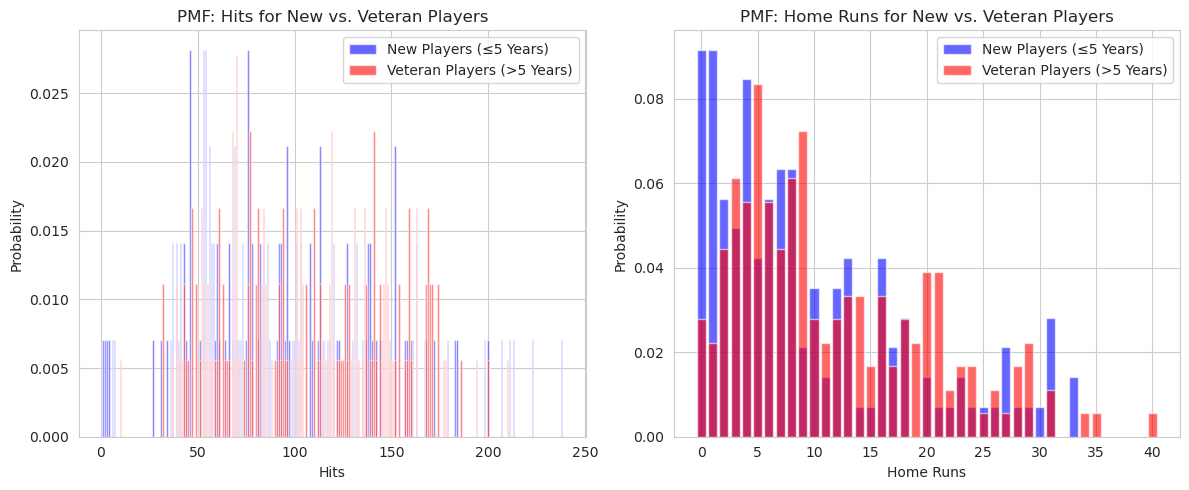

In [14]:
#Import all the libraries needed to complete PMF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load baseball data
df = pd.read_csv("data/Hitters.csv")

#Remove missing values
df = df[["Years", "Hits", "HmRun"]].dropna()

#There are two player experience groups:
#New players: Players who have been part of the league for 5 years or less
#Veteran players: Players who have been part of the league for more than 5 years
new_players = df[df["Years"] <= 5]
veteran_players = df[df["Years"] > 5]

#Call to function to calculate PMF
def compute_pmf(data, column):
    pmf = data[column].value_counts(normalize=True).sort_index()
    return pmf

#Calculate PMF for Hits in both new and veteran players
pmf_hits_new = compute_pmf(new_players, "Hits")
pmf_hits_veteran = compute_pmf(veteran_players, "Hits")

#Plot PMF for Hits
plt.figure(figsize=(12, 5))  #Set the size of the graph
plt.subplot(1, 2, 1)  #The graph will have 1-row, 2-columns 
plt.bar(pmf_hits_new.index, pmf_hits_new.values, color="blue", alpha=0.6, label="New Players (≤5 Years)")  #blue line represents new players
plt.bar(pmf_hits_veteran.index, pmf_hits_veteran.values, color="red", alpha=0.6, label="Veteran Players (>5 Years)")  #Red line represents veteran players
plt.xlabel("Hits") #Name x-axis Hits
plt.ylabel("Probability")  #Name y-axis Probability
plt.title("PMF: Hits for New vs. Veteran Players")   #Add title
plt.legend()

#Calculate PMF for Home Runs in both new and veteran players
pmf_hr_new = compute_pmf(new_players, "HmRun")
pmf_hr_veteran = compute_pmf(veteran_players, "HmRun")

#Plot PMF for Home Runs
plt.subplot(1, 2, 2)   #The graph will have 1-row, 2-columns 
plt.bar(pmf_hr_new.index, pmf_hr_new.values, color="blue", alpha=0.6, label="New Players (≤5 Years)")  #Blue line represents new players
plt.bar(pmf_hr_veteran.index, pmf_hr_veteran.values, color="red", alpha=0.6, label="Veteran Players (>5 Years)")   #Red line represents veteran players
plt.xlabel("Home Runs")  #Name x-axis Home Runs
plt.ylabel("Probability")  #Name y-axis Probability
plt.title("PMF: Home Runs for New vs. Veteran Players")   #Add title
plt.legend()

plt.tight_layout()  #Modify layout so the graphs don't overlap
plt.show()


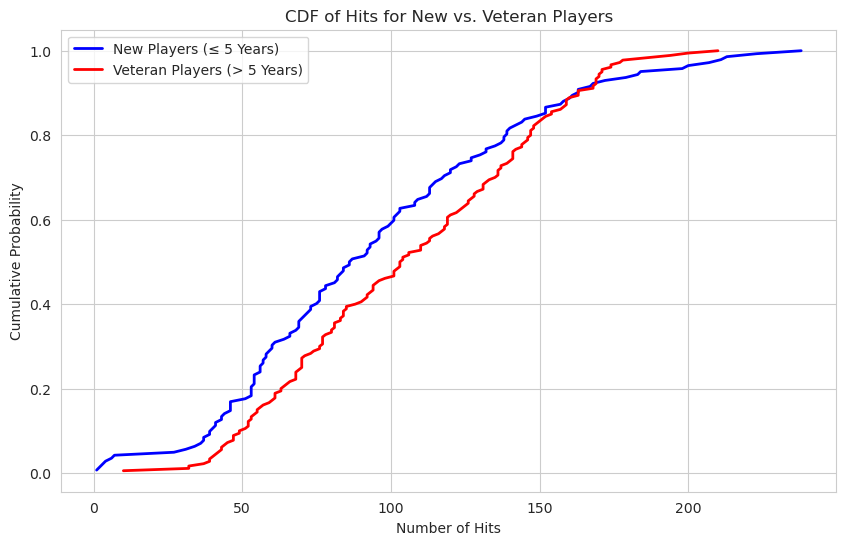

In [16]:
#Calculate CDF for the number of hits for both new and veteran players
#Sort the data for hits for both new and veteran players
hits_new_sorted = df[df['Years'] <= 5]['Hits'].sort_values()
hits_veteran_sorted = df[df['Years'] > 5]['Hits'].sort_values()

#Calculate the CDF by calculating the cumulative sum of probabilities
cdf_hits_new = np.arange(1, len(hits_new_sorted) + 1) / len(hits_new_sorted)
cdf_hits_veteran = np.arange(1, len(hits_veteran_sorted) + 1) / len(hits_veteran_sorted)

#Plot the CDF for hits
plt.figure(figsize=(10, 6))  #Identify the size of the graph

#Plot CDF for new players. Blue represents new players
plt.plot(hits_new_sorted, cdf_hits_new, color="blue", label="New Players (≤ 5 Years)", linewidth=2)

#Plot CDF for veteran players. Red represents veteran players
plt.plot(hits_veteran_sorted, cdf_hits_veteran, color="red", label="Veteran Players (> 5 Years)", linewidth=2)

#Add labels to the graph
plt.xlabel("Number of Hits")  #Name x-axis Number of Hits
plt.ylabel("Cumulative Probability")  #Name y-axis Cumulative Probability
plt.title("CDF of Hits for New vs. Veteran Players")  #Add title to the graph

#Add a legend to the graph
plt.legend()

#Show the graph
plt.show()


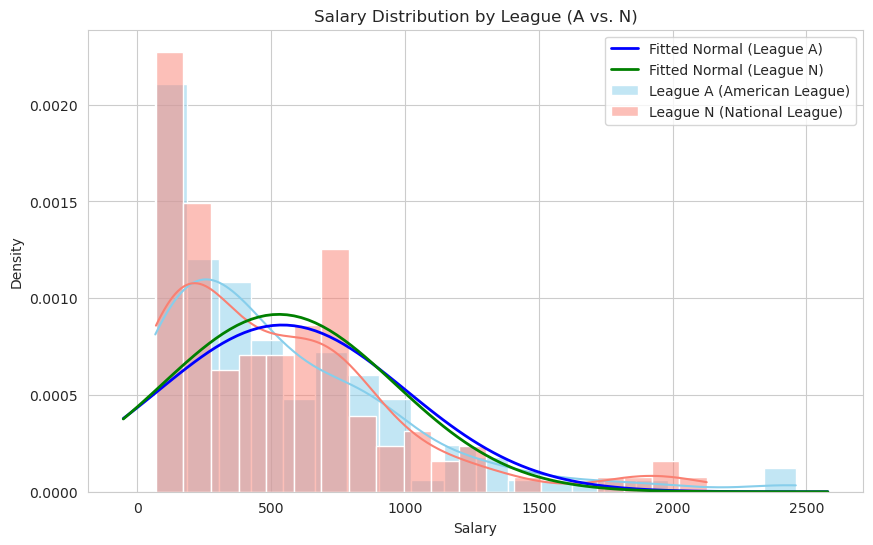

In [24]:
#Import all the libraries needed to perform normal distribution
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

#Load the baseball data
df = pd.read_csv("data/Hitters.csv")

#Remove any rows where salary is missing
df = df.dropna(subset=['Salary'])  

#Divide the data by League (American (A) vs. Natiobal (N)) for salary analysis
league_a_salary = df[df['League'] == 'A']['Salary']
league_n_salary = df[df['League'] == 'N']['Salary']

#Plot the distribution of salary by league via histograms
plt.figure(figsize=(10, 6))

#Graph for American league with blue line
sns.histplot(league_a_salary, bins=20, kde=True, color="skyblue", label="League A (American League)", stat="density")
#Graph for National league with red line
sns.histplot(league_n_salary, bins=20, kde=True, color="salmon", label="League N (National League)", stat="density")

#Fit and plot the normal distribution for American league
mu_a, std_a = stats.norm.fit(league_a_salary)  #Estimates the parameters of the normal distribution, mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)  #Create 100 points between the min and max values to draw the normal curve
p_norm_a = stats.norm.pdf(x, mu_a, std_a)   #Calculate the normal distribution
plt.plot(x, p_norm_a, 'b', linewidth=2, label="Fitted Normal (League A)")  #Draw the normal distribution curve for the American League using a blue line

#Fit and plot the normal distribution for National league
mu_n, std_n = stats.norm.fit(league_n_salary)  #Estimates the parameters of the normal distribution, mean and standard deviation
p_norm_n = stats.norm.pdf(x, mu_n, std_n)  #Calculate the normal distribution
plt.plot(x, p_norm_n, 'g', linewidth=2, label="Fitted Normal (League N)")  #Draw the normal distribution curve for the National League using a green line


plt.title("Salary Distribution by League (A vs. N)")  #Add title
plt.xlabel("Salary")  #Name the x-axis Salary
plt.ylabel("Density")   #Name the y-axis Density

#Add the legend
plt.legend()

#Show the graph
plt.show()



Observed Difference in Means: 12.88204676258988
P-value from Permutation Test: 0.8128


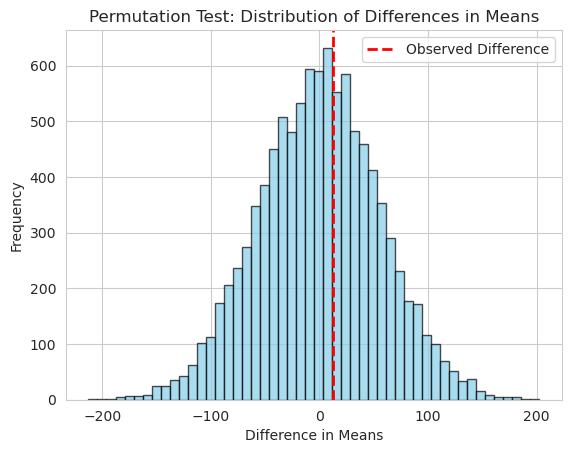

Fail to reject the null hypothesis: There is no significant difference in salaries between League A and League N.


In [34]:
#Import all the file needed to complete the permutation hypothesis test
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the baseball data
df = pd.read_csv("data/Hitters.csv")

#Remove any rows where salary is missing 
df = df.dropna(subset=['Salary'])  # Drop rows with missing Salary values

#Divide the data by League (American (A) vs. Natiobal (N)) for salary analysis
league_a_salary = df[df['League'] == 'A']['Salary']
league_n_salary = df[df['League'] == 'N']['Salary']

#Calculate the observed difference in means between american and national league
observed_diff = np.mean(league_a_salary) - np.mean(league_n_salary)

#Combine both salary lists into one for permutation
combined_salaries = np.concatenate([league_a_salary, league_n_salary])

#Identify the number of permutations to run
n_permutations = 10000
permutation_diffs = []

#Perform the permutation test
for _ in range(n_permutations):
    np.random.shuffle(combined_salaries)  #Shuffle the list
    #Re-split into two groups: American and National league
    perm_league_a = combined_salaries[:len(league_a_salary)]
    perm_league_n = combined_salaries[len(league_a_salary):]
    #Calculate the difference in means for the permuted groups
    perm_diff = np.mean(perm_league_a) - np.mean(perm_league_n)
    permutation_diffs.append(perm_diff)

#Calculate the p-value
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_diff))

#Show the means and the calculated p-value from the permutation test
print(f"Observed Difference in Means: {observed_diff}")
print(f"P-value from Permutation Test: {p_value}")

#Graph the distribution of permututation differences
plt.hist(permutation_diffs, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label="Observed Difference")  #show the observed differences with a red line
plt.title("Permutation Test: Distribution of Differences in Means")  #Add title
plt.xlabel("Difference in Means")  #Name the x-axis Difference in Means
plt.ylabel("Frequency")   #Name the y-axis Frequency
plt.legend()  #All legend
plt.show()

#P-value decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in salaries between League A and League N.")   #If the p-value is less than alpha, we reject the null hypothesis
else:
    print("Fail to reject the null hypothesis: There is no significant difference in salaries between League A and League N.")  #If the p-value is greater than alpha, we fail to reject the null hypothesis

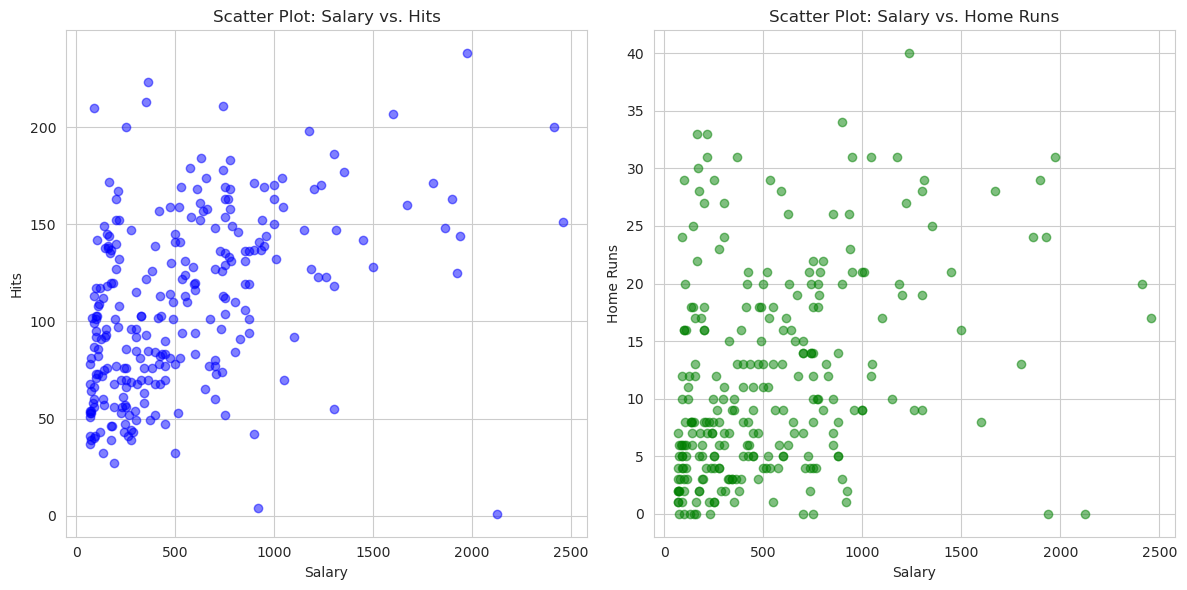

Covariance between Salary and Hits: 8930.047899602356
Pearson's Correlation between Salary and Hits: 0.438674737869411
Covariance between Salary and Home Runs: 1355.130668751633
Pearson's Correlation between Salary and Home Runs: 0.34302807815466363


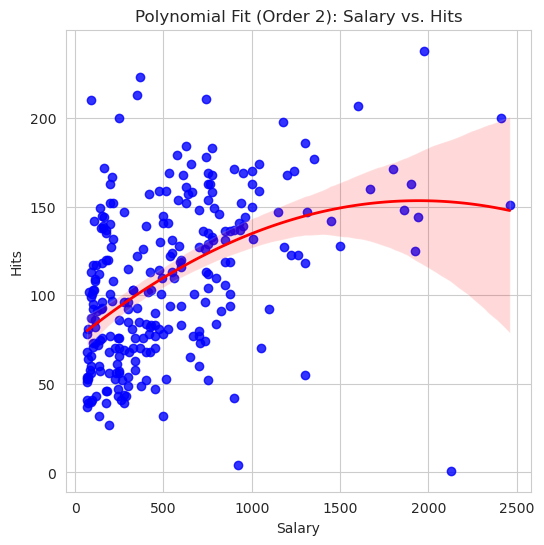

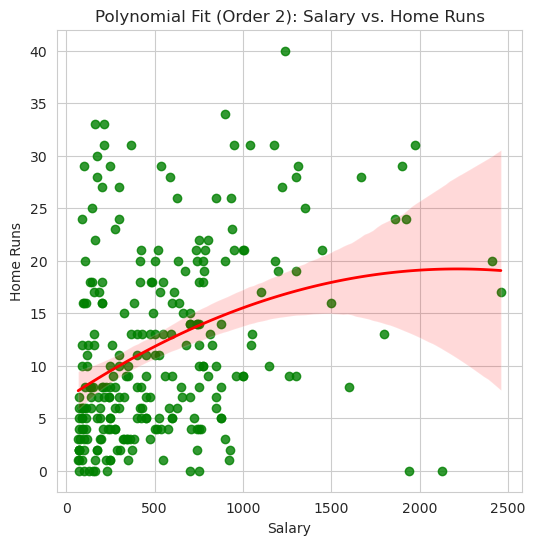

In [54]:
#Import all the files and libraries needed to create two scatter plots and analyze correlation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

#Load baseball data
df = pd.read_csv("data/Hitters.csv")  

#Clean the data by dropping NaN values and removing infinities
df = df.replace([np.inf, -np.inf], np.nan)  
df = df.dropna(subset=['Salary', 'Hits', 'HmRun'])  

#Identify the size of the graph
plt.figure(figsize=(12, 6))

#Scatter Plot 1: Salary vs. Hits
plt.subplot(1, 2, 1)  #The graph will have 1-row, 2-columns 
plt.scatter(df['Salary'], df['Hits'], color='blue', alpha=0.5)  #This graph is represented in blue
plt.title("Scatter Plot: Salary vs. Hits")  #Add title
plt.xlabel("Salary")  #Name x-axis Salary
plt.ylabel("Hits")   #Name y-axis Hits

#Scatter Plot 2: Salary vs. Home Runs
plt.subplot(1, 2, 2)  #The graph will have 1-row, 2-columns 
plt.scatter(df['Salary'], df['HmRun'], color='green', alpha=0.5)  #This graph is represented in green
plt.title("Scatter Plot: Salary vs. Home Runs")  #Add title
plt.xlabel("Salary")  #Name x-axis Salary
plt.ylabel("Home Runs")   #Name y-axis Home Runs

#Display the graph. Modify the graph so there's no overlap
plt.tight_layout()
plt.show()

#Calculate covariance between salary and hits
covariance_hits = np.cov(df['Salary'], df['Hits'])[0][1]
print(f"Covariance between Salary and Hits: {covariance_hits}")

#Calculate Pearson's correlation between salary and hits
corr_hits, _ = pearsonr(df['Salary'], df['Hits'])
print(f"Pearson's Correlation between Salary and Hits: {corr_hits}")

#Calculate covariance between salary and home runs
covariance_home_runs = np.cov(df['Salary'], df['HmRun'])[0][1]
print(f"Covariance between Salary and Home Runs: {covariance_home_runs}")

#Calculate Pearson's correlation between salary and home runs
corr_home_runs, _ = pearsonr(df['Salary'], df['HmRun'])
print(f"Pearson's Correlation between Salary and Home Runs: {corr_home_runs}")

#Explore potential non-linear relationships 
#Scatter plot with polynomial fit for salary vs hits 
plt.figure(figsize=(6, 6))  #Identify the size of the graph
sns.regplot(x='Salary', y='Hits', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red', 'linewidth':2}, order=2)   #This graph is represented in blue
plt.title("Polynomial Fit (Order 2): Salary vs. Hits")  #Add title
plt.xlabel("Salary")  #Name x-axis Salary
plt.ylabel("Hits")   #Name y-axis Hits
plt.show()

#Scatter plot with polynomial fit for salary vs home runs
plt.figure(figsize=(6, 6))  #Identify the size of the graph
sns.regplot(x='Salary', y='HmRun', data=df, scatter_kws={'color':'green'}, line_kws={'color':'red', 'linewidth':2}, order=2)  #This graph is represented in green
plt.title("Polynomial Fit (Order 2): Salary vs. Home Runs")  #Add title
plt.xlabel("Salary")  #Name x-axis Salary
plt.ylabel("Home Runs")   #Name y-axis Home Runs
plt.show()


Regression Analysis using Statsmodels:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     24.50
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           5.48e-14
Time:                        23:48:10   Log-Likelihood:                -1947.2
No. Observations:                 263   AIC:                             3902.
Df Residuals:                     259   BIC:                             3917.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

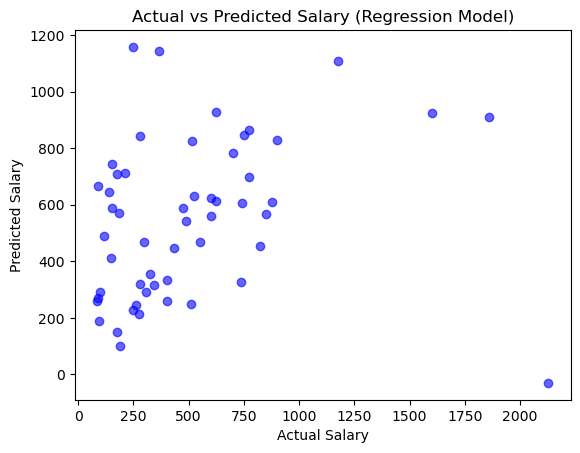

In [11]:
#Import all the libraries needed to complete regression analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Load the baseball dataset
df = pd.read_csv("data/Hitters.csv")  

#Handle missing values
df = df.replace([np.inf, -np.inf], np.nan)  #Convert infinities to NaN
df = df.dropna(subset=['Salary', 'Hits', 'HmRun', 'RBI'])  #Drop rows with NaN values

#Select independent and dependent variables
X = df[['Hits', 'HmRun', 'RBI']]  #Independent variables
y = df['Salary']  #Dependent variable

#Statsmodels Regression Analysis
#Add constant for intercept
X_with_const = sm.add_constant(X)

#Fit OLS regression model
model = sm.OLS(y, X_with_const).fit()

#Show regression summary such as coefficients, R², p-values
print("\nRegression Analysis using Statsmodels:")
print(model.summary())

#Scikit-Learn Model for prediction and visualization
#Separate data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the Linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Show regression coefficients and intercept
print("\nMultiple Regression Coefficients (Scikit-Learn):")
for feature, coef in zip(X.columns, regressor.coef_):
    print(f"{feature}: {coef}")

print(f"Intercept: {regressor.intercept_}")

#Predict salaries using test data
y_pred = regressor.predict(X_test)

#Scatter plot: Actual vs Predicted Salary
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  #The graph is represented in blue
plt.xlabel("Actual Salary")   #Name x-axis Actual Salary
plt.ylabel("Predicted Salary")   #Name y-axis Predicted Salary
plt.title("Actual vs Predicted Salary (Regression Model)")  #Add title
plt.show()
